## Final Project Submission

Please fill out:
* Student name: Dan Tong
* Student pace: self paced / part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview
The objective of this project is to analyze Kings County housing data to provide insight on price drivers and market trends on houses. I will be making recommendations to a real estate agency on what features of a home best predict sale price. To do this, I will be building a linear regression model to analyze and predict key features to maximize the sale price of a house.

## Data Understanding

#### Names and Descriptions of the Kings County Dataset Features
- id - Unique identifier for a house
- date - Date house was sold
- price - Sale price (prediction target)
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - Square footage of living space in the home
- sqft_lot - Square footage of the lot
- floors - Number of floors (levels) in house
- waterfront - Whether the house is on a waterfront
Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
- view - Quality of view from house
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
condition - How good the overall condition of the house is. Related to maintenance of house.
See the King County Assessor Website for further explanation of each condition code
- grade - Overall grade of the house. Related to the construction and design of the house.
See the King County Assessor Website for further explanation of each building grade code
- sqft_above - Square footage of house apart from basement
- sqft_basement - Square footage of the basement
- yr_built - Year when house was built
- yr_renovated - Year when house was renovated
- zipcode - ZIP Code used by the United States Postal Service
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing data
df = pd.read_csv('data/kc_house_data.csv')

#dropping irrelevent features
df = df.drop(columns=['date','id','sqft_lot15','waterfront','lat','long'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,1340
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,1690
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,2720
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,1360
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,1800


In [3]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21534 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 2.5+ MB


price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
dtype: int64

Here, we see that the dataset is primarily comprised of numerical values, however there are variables that have the "object" dtype. These may be able to be used as categorical data or may be problematic.
- view
- condition
- grade
- sqft_basment

There are also variables that contain null values.
- view
- yr_renovated

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,1986.620318
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,685.230472
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000


By examining some of the descriptive information of the dataframe, I noticed a few issues that I will need to address:

One problem is an outlier with "bedrooms." There is a max of 33 bedrooms but a min of 1, mean of 3.37 and median of 4.

Another issue is with "yr_renovated." Some houses, actually most houses, in this dataset have never been renovated.

In [5]:
#examining the outlier
df.loc[(df['bedrooms']) == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
15856,640000.0,33,1.75,1620,6000,1.0,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,1330


## Data Cleaning - Dealing with Null Values
The first step that I will be taking is dealing with the null values in the "view" and "yr_renovated" columns.
#### View
There are only 63 null values in the 'view' feature. We can safely remove those without it significantly affecting the dataset.

In [6]:
df = df.dropna(subset=['view'])

#### Year Renovated
When examining the 'yr_renovated' feature, I noticed that the large majority of houses in the dataset were never renovated. 

When inspecting the null values further, there doesn't seem to be much in common among the entries. The mins, max, and means seem to be quite similar with the rest of the dataset.

Because of this information, I believe it's safe to operate under the assumption that the houses missing data were never renovated.

In [7]:
#Examining the frequency in the 'yr_renovated' column
df['yr_renovated'].value_counts()

0.0       16961
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [8]:
#examining rows with null values in 'yr_renovated'
df[df['yr_renovated'].isnull()].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,2720
12,310000.0,3,1.00,1430,19901,1.5,NONE,Good,7 Average,1430,0.0,1927,NaN,98028,1780
23,252700.0,2,1.50,1070,9643,1.0,NONE,Average,7 Average,1070,0.0,1985,NaN,98030,1220
26,937000.0,3,1.75,2450,2691,2.0,NONE,Average,8 Good,1750,700.0,1915,NaN,98119,1760
28,438000.0,3,1.75,1520,6380,1.0,NONE,Average,7 Average,790,730.0,1948,NaN,98115,1520


In [9]:
df[df['yr_renovated'].isnull()].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
count,3.830000e+03,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,0.0,3830.000000,3830.000000
mean,5.386206e+05,3.349347,2.093668,2061.622977,14269.193995,1.485770,1774.670235,1970.478851,NaN,98078.802350,1971.087990
std,3.586959e+05,0.895795,0.775070,920.888937,38080.232022,0.545519,833.223259,29.482805,NaN,53.595847,686.966541
min,7.800000e+04,1.000000,0.500000,500.000000,635.000000,1.000000,490.000000,1900.000000,NaN,98001.000000,460.000000
25%,3.229760e+05,3.000000,1.500000,1410.000000,5040.000000,1.000000,1180.000000,1950.000000,NaN,98033.000000,1470.000000
50%,4.500000e+05,3.000000,2.250000,1894.500000,7667.000000,1.000000,1540.000000,1974.000000,NaN,98070.000000,1820.000000
75%,6.430000e+05,4.000000,2.500000,2530.000000,10706.000000,2.000000,2190.000000,1996.000000,NaN,98118.000000,2320.000000
max,5.570000e+06,8.000000,6.750000,9200.000000,881654.000000,3.500000,8020.000000,2015.000000,NaN,98199.000000,5790.000000


In [10]:
#replacing null values in 'yr_renovated'
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
dtype: int64

## Data Cleaning - Dealing with Objects

In [11]:
#Examining 'view'
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
#Examining 'condition'
df['condition'].value_counts()

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64

The 'condition' feature is a rating because of that I will convert it into a numerical value. '1' for 'Poor' and '5' for 'Very Good'

In [20]:
#transforming 'condition' into a 1-5 scale
condition_name = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
condition_value =  ['1', '2', '3', '4', '5']

df['condition'] = df['condition'].replace(condition_name, condition_value).astype(int)

In [13]:
#Examining 'grade'
df['grade'].value_counts()

7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

The 'grade' feature has a score and rating, so I will just adjust the values to just be the numerical value.

In [14]:
#replacing everything after the number
df['grade'] = df['grade'].str.replace(r"\D", '').astype(int)
df['grade'].value_counts()

7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [15]:
#Examining 'sqft_basement'
df['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 302, dtype: int64

Now, we notice why 'sqft_basement' is an object instead of a number value like the other sqft features. 

There are 452 entries with a '?' and this is essentially the same as a null value, so let's examine it.

In [16]:
df[df['sqft_basement'] == '?'].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
6,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7,1715,?,1995,0.0,98003,2238
18,189000.0,2,1.00,1200,9850,1.0,NONE,Good,7,1200,?,1921,0.0,98002,1060
42,861990.0,5,2.75,3595,5639,2.0,NONE,Average,9,3595,?,2014,0.0,98053,3625
79,720000.0,4,2.50,3450,39683,2.0,NONE,Average,10,3450,?,2002,0.0,98010,3350
112,272500.0,3,1.75,1540,12600,1.0,NONE,Good,7,1160,?,1980,0.0,98038,1540


In [17]:
df[df['sqft_basement'] == '?'].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
count,4.520000e+02,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,5.312318e+05,3.402655,2.106195,2055.00885,15697.327434,1.517699,7.643805,1767.920354,1970.019912,92.530973,98081.694690,1957.500000
std,3.334266e+05,0.990774,0.790608,898.76675,50138.367353,0.559851,1.123872,798.726174,31.766150,419.681990,52.384682,665.180767
min,1.025000e+05,1.000000,0.500000,600.00000,681.000000,1.000000,5.000000,600.000000,1900.000000,0.000000,98001.000000,740.000000
25%,3.222500e+05,3.000000,1.500000,1430.00000,5000.000000,1.000000,7.000000,1167.500000,1944.750000,0.000000,98033.000000,1490.000000
50%,4.595000e+05,3.000000,2.250000,1910.00000,7199.500000,1.500000,7.000000,1595.000000,1975.000000,0.000000,98074.000000,1800.000000
75%,6.500000e+05,4.000000,2.500000,2525.00000,10443.000000,2.000000,8.000000,2180.000000,1999.250000,0.000000,98118.250000,2342.500000
max,3.420000e+06,7.000000,5.500000,6930.00000,881654.000000,3.000000,11.000000,5450.000000,2015.000000,2014.000000,98199.000000,4560.000000


I see that the data is fairly consistent with the rest of the dataset. I also see that the majority of houses in this dataset do not have basements, so I think we can apply the same logic that was used when addressing the missing values in the 'yr_renovated' feature.

In [18]:
#replacing '?' values in 'sqft_basement' and converting it from an object datatype
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0').astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   view           21534 non-null  object 
 7   condition      21534 non-null  object 
 8   grade          21534 non-null  int32  
 9   sqft_above     21534 non-null  int64  
 10  sqft_basement  21534 non-null  float64
 11  yr_built       21534 non-null  int64  
 12  yr_renovated   21534 non-null  float64
 13  zipcode        21534 non-null  int64  
 14  sqft_living15  21534 non-null  int64  
dtypes: float64(5), int32(1), int64(7), object(2)
memory usage: 2.5+ MB


## Data Visualization

#### Histograms For the Variables
Now that I cleaned the dataset, I'm plotting the features to examine normality. Many features are skewed so I will be normalizing them by using log transformation. 

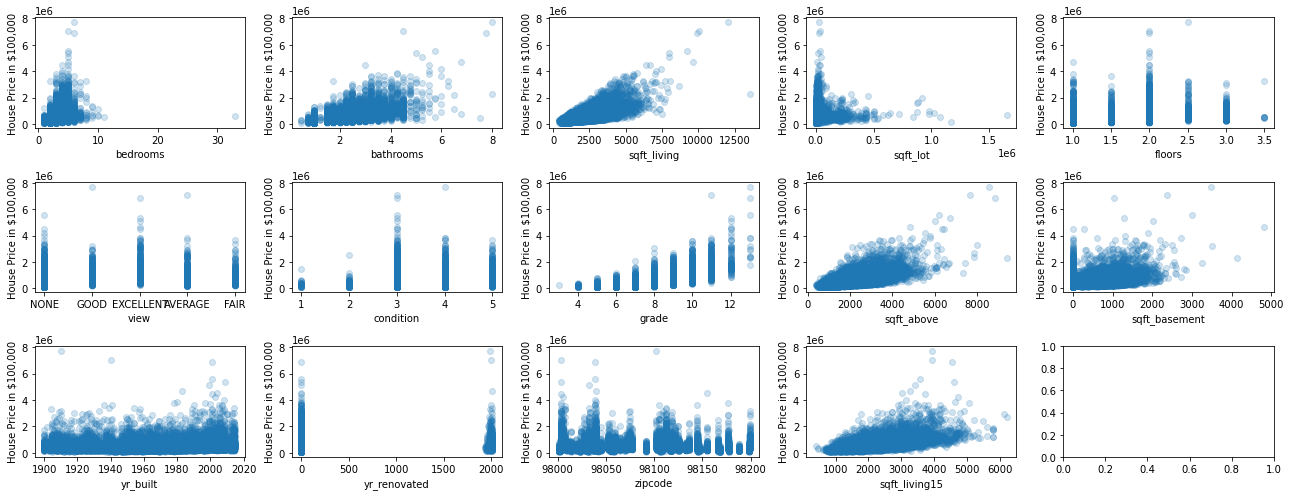

In [27]:
#Use at somepoint
X = df.drop('price', axis=1)
y = df['price']

fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(18,7))
fig.set_tight_layout(True)

for ind, col in enumerate(X.columns):
    ax = axes[ind//5][ind%5]
    ax.scatter(X[col], y, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("House Price in $100,000");

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.035393,0.668307,0.605695,0.319082,0.054273,0.117982,-0.053620,0.585304
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.026402,0.356095,0.479148,0.296548,0.155462,0.017797,-0.153990,0.392874
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,-0.126682,0.665312,0.686173,0.277583,0.507565,0.046955,-0.204435,0.569139
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,-0.059783,0.762398,0.876553,0.427422,0.318217,0.050871,-0.199839,0.756208
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,-0.008375,0.115122,0.184325,0.015097,0.052646,0.005091,-0.129846,0.145142
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,-0.264138,0.458694,0.523367,-0.242348,0.489410,0.003317,-0.058966,0.279176
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,1.000000,-0.147326,-0.158830,0.167889,-0.361398,-0.055730,0.002125,-0.093172
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,-0.147326,1.000000,0.755977,0.164272,0.448255,0.015235,-0.185710,0.713462
sqft_above,0.605695,0.479148,0.686173,0.876553,0.184325,0.523367,-0.158830,0.755977,1.000000,-0.052292,0.423999,0.020216,-0.261480,0.731543
sqft_basement,0.319082,0.296548,0.277583,0.427422,0.015097,-0.242348,0.167889,0.164272,-0.052292,1.000000,-0.130474,0.065415,0.073385,0.198399


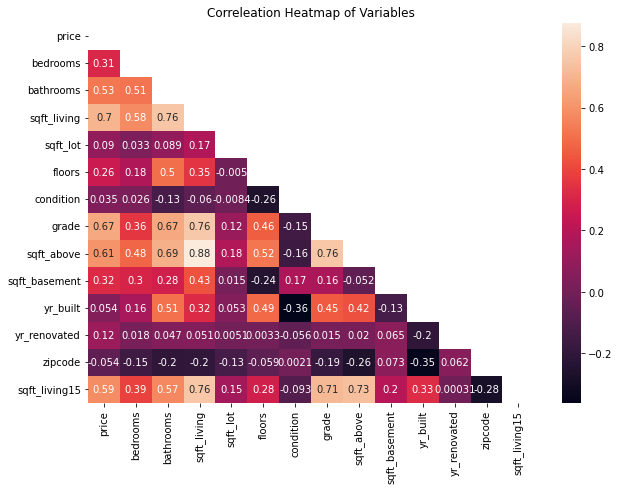

In [39]:
#Use at somepoint

#heatmap to show multicollinearity
heatmap_df = pd.concat([y, X], axis=1)
corr = heatmap_df.corr()

fig, ax = plt.subplots(figsize = (10,7))

sns.heatmap(
    data = corr,
    mask = np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correleation Heatmap of Variables');

df.corr()